In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 24ms/step - loss: 0.7544 - accuracy: 0.4383 - val_loss: 0.7575 - val_accuracy: 0.4415
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 0.6777 - accuracy: 0.5774 - val_loss: 0.6871 - val_accuracy: 0.5851
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.6147 - accuracy: 0.6850 - val_loss: 0.6251 - val_accuracy: 0.6915
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.5615 - accuracy: 0.7664 - val_loss: 0.5726 - val_accuracy: 0.7660
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 0.5163 - accuracy: 0.8110 - val_loss: 0.5291 - val_accuracy: 0.8032
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.4790 - accuracy: 0.8478 - val_loss: 0.4917 - val_accuracy: 0.8404
Epoch 7/100
12/12 [==============================] - 0s 11ms/step - loss: 0.4470 - accuracy: 0.8845 - val_loss: 0.4595 - val_accuracy: 0.8617
Epoch 

12/12 [==============================] - 0s 11ms/step - loss: 0.1203 - accuracy: 0.9764 - val_loss: 0.1300 - val_accuracy: 0.9574
Epoch 59/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1190 - accuracy: 0.9764 - val_loss: 0.1286 - val_accuracy: 0.9574
Epoch 60/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1177 - accuracy: 0.9764 - val_loss: 0.1274 - val_accuracy: 0.9574
Epoch 61/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1165 - accuracy: 0.9764 - val_loss: 0.1262 - val_accuracy: 0.9574
Epoch 62/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1152 - accuracy: 0.9764 - val_loss: 0.1250 - val_accuracy: 0.9574
Epoch 63/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1141 - accuracy: 0.9764 - val_loss: 0.1239 - val_accuracy: 0.9574
Epoch 64/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1130 - accuracy: 0.9764 - val_loss: 0.1227 - val_accuracy: 0.9574
Epoch 65/100

In [40]:
print("Train Score : ", model.evaluate(X_train, y_train))
print("Test Score : ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9843
Train Score :  [0.08514666557312012, 0.9842519760131836]
6/6 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9734
Test Score :  [0.09485520422458649, 0.9734042286872864]


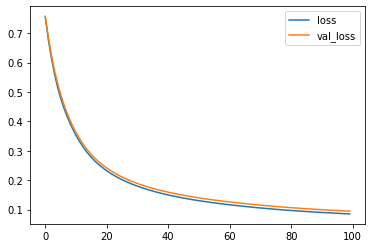

In [41]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

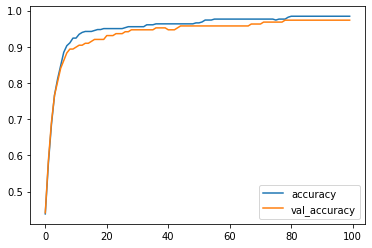

In [42]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [43]:
Pred = model.predict(X_test)

In [50]:
Pred.argmax(axis=1)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)